# Google Trends

Google Trends é uma ferramenta do Google que mostra os mais populares termos buscados em um passado recente.

## Relatório de comparação de tendências

In [58]:
import math
from pickletools import uint8
from pytrends.request import TrendReq
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plotComparison(dataFrame:DataFrame, cols:uint8, showValues=False, Incerteza=False, ylin=[]):
    plt.figure(figsize=(20,5))
    Patch = []
    if (len(ylin)>0):
        plt.axes().set_ylim(ylin)
    for col in dataFrame.columns[0:cols]:
        color = 'red' if col == dataFrame.columns[0] else 'blue' if col == dataFrame.columns[1] else 'orange'
        Patch.append(mpatches.Patch(color=color, label=col))
        if Incerteza:
            for i in range(len(dataFrame[col])):
                plt.plot(dataFrame[col][i:i+2], label=col, color=color, linewidth=dataFrame['Incerteza'][i]*2)
        else:
            plt.plot(dataFrame[col], label=col, color=color)
    plt.legend(handles=Patch)
    if showValues:
        for index, row in dataFrame.iterrows():
            if index.minute == 0 and index.hour == 0 and index.second == 0 and index.microsecond == 0:
                for col in dataFrame.columns[0:cols]:
                    plt.text(index, row[col], "{:.1f}".format(row[col]))
                

# Palavras-chave
kw_list = ["Lula", "Bolsonaro", "lula bolsonaro"]

conn = TrendReq(hl='pt-BR', tz=360,  requests_args={'verify':False}) # Conexão com o Google Trends


web = conn.get_historical_interest(kw_list, year_start=2022, month_start=10, day_start=3, hour_start=0, year_end=2022, month_end=10, day_end=30, hour_end=0, geo='BR') 

/home/jonculau/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/jonculau/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/jonculau/anaconda3/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/home/jonculau/anacond

The request failed: Google returned a response with code 400.


### Dados Lidos do Google Trends

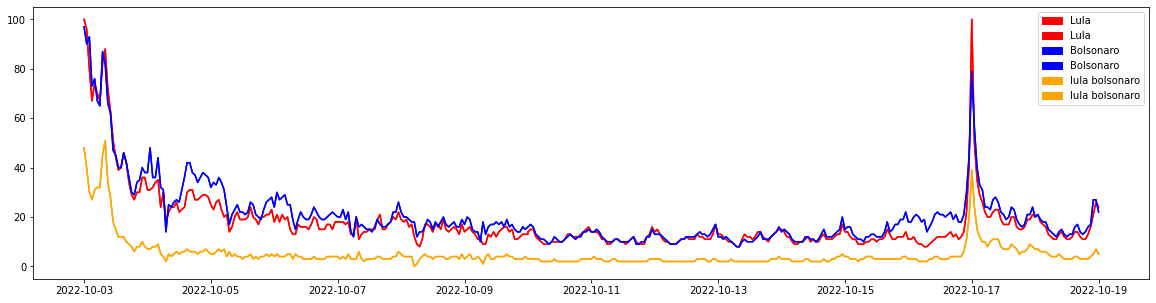

In [59]:
plotComparison(web, 3)

### Dados Acumulados (Escala Log)

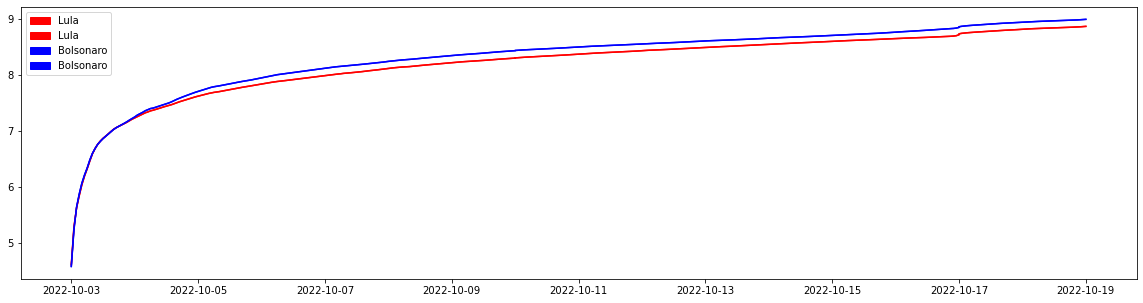

In [60]:
accum = []
idArr = []
for index,row in web.iterrows():
   idArr.append(index)
   accum.append({'Lula':row['Lula'], 'Bolsonaro':row['Bolsonaro'], 'lula bolsonaro':row['lula bolsonaro']})
   if len(accum) >= 2:
       accum[-1]['Bolsonaro'] += accum[-2]['Bolsonaro'] 
       accum[-1]['Lula'] += accum[-2]['Lula']
       accum[-1]['lula bolsonaro'] += accum[-2]['lula bolsonaro']
       
dataFrame = DataFrame(accum,index=idArr)
dataFrame['Bolsonaro'] = dataFrame['Bolsonaro'].apply(lambda x: math.log(x))
dataFrame['Lula'] = dataFrame['Lula'].apply(lambda x: math.log(x))
dataFrame['lula bolsonaro'] = dataFrame['lula bolsonaro'].apply(lambda x: math.log(x))
plotComparison(dataFrame, 3)

## Acumulado (Percentual)

(Espessura da linha determinada pelas pesquisas envolvendo os dois simultaneamente multiplicado por 2)


In [61]:
accumPercent = []
for x in accum:
   accumPercent.append({
       'Lula':  x['Lula']/ (x['Bolsonaro'] + x['Lula']) * 100,
       'Bolsonaro': x['Bolsonaro']/ (x['Bolsonaro'] + x['Lula']) * 100,
       'Incerteza': x['lula bolsonaro'] / (x['Bolsonaro'] + x['Lula'] + x['lula bolsonaro']) * 100
       })
dataFrame = DataFrame(accumPercent,index=idArr)
plotComparison(dataFrame, 2, True, True , ylin=[0,100])



ValueError: Image size of 1222846x307 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1440x360 with 1 Axes>